## EXTRACTING TEXT FROM DIFFERENT FILE SOURCES

* IMAGE

* PDF

* DOCX

## EXTRACTING TEXT FROM IMAGES

OCR - OPTICAL CHARACTER RECOGNITION

In [1]:
pip install pytesseract opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt


In [20]:
#Lets load and processs the image
img = cv2.imread(r"C:\Users\SAI\Downloads\prescription.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #CONVERT BGR TO RGB

In [21]:
img

array([[[ 14,   2,   6],
        [ 14,   2,   6],
        [ 16,   1,   6],
        ...,
        [109, 100,  95],
        [114, 105, 100],
        [120, 111, 106]],

       [[ 15,   3,   7],
        [ 15,   3,   7],
        [ 17,   2,   7],
        ...,
        [110, 101,  96],
        [115, 106, 101],
        [121, 112, 107]],

       [[ 16,   4,   8],
        [ 16,   4,   8],
        [ 18,   3,   8],
        ...,
        [111, 102,  97],
        [116, 107, 102],
        [122, 113, 108]],

       ...,

       [[  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2],
        ...,
        [ 44,  29,  10],
        [ 44,  29,  10],
        [ 44,  29,  10]],

       [[  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2],
        ...,
        [ 44,  29,  10],
        [ 44,  29,  10],
        [ 44,  29,  10]],

       [[  7,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2],
        ...,
        [ 43,  28,   7],
        [ 43,  28,   7],
        [ 43,  28,   7]]

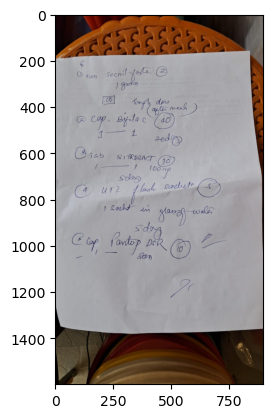

In [22]:
plt.imshow(img)

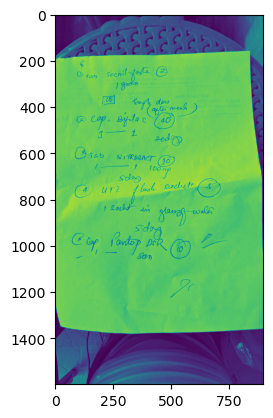

In [23]:
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey)

In [25]:
#in order to hold and not to destroy the new window created by cv2
#we add weight and after pressing some key only it will vanish

cv2.imshow('Grey Image',img_grey)#convert bgr to gray
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
_,image_btw = cv2.threshold(img_grey,150,255,cv2.THRESH_BINARY)

In [27]:
image_btw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
cv2.imshow('Black and White Image',image_btw)#black and white image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [31]:
print(pytesseract.image_to_string(image_btw))

&
© pan seenil pos @
1g?
pal dor gy
mead |

@ Cp Dylac Vi

TOE edie
Qrae wim

7 lOc

eG ur? fk sod (2)

1 Labs 15 2 ap
ot I —
oz,

f




NOTE :

* tesseract is working fine when we have
a clear image with typed characters.
But as we are giving any image of handwritten notes, the text that is extracting is not good enough.

* Lets try another approach and use LLM Model as OCR, we will compare results and see



In [35]:
import google.generativeai as genai
import os
import cv2
key = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key = key)

In [33]:
model = genai.GenerativeModel('gemini-2.5-flash-lite')

In [34]:
prompt = '''
You need to perform OCR as given image and extract the text from it.
Give only the text as output, do not give any other explanation or description
'''

In [36]:
from PIL import Image

In [38]:
#The image that cv2 gives is in numpy array format, we need to convert it into image object
final_image = Image.fromarray(image_btw)

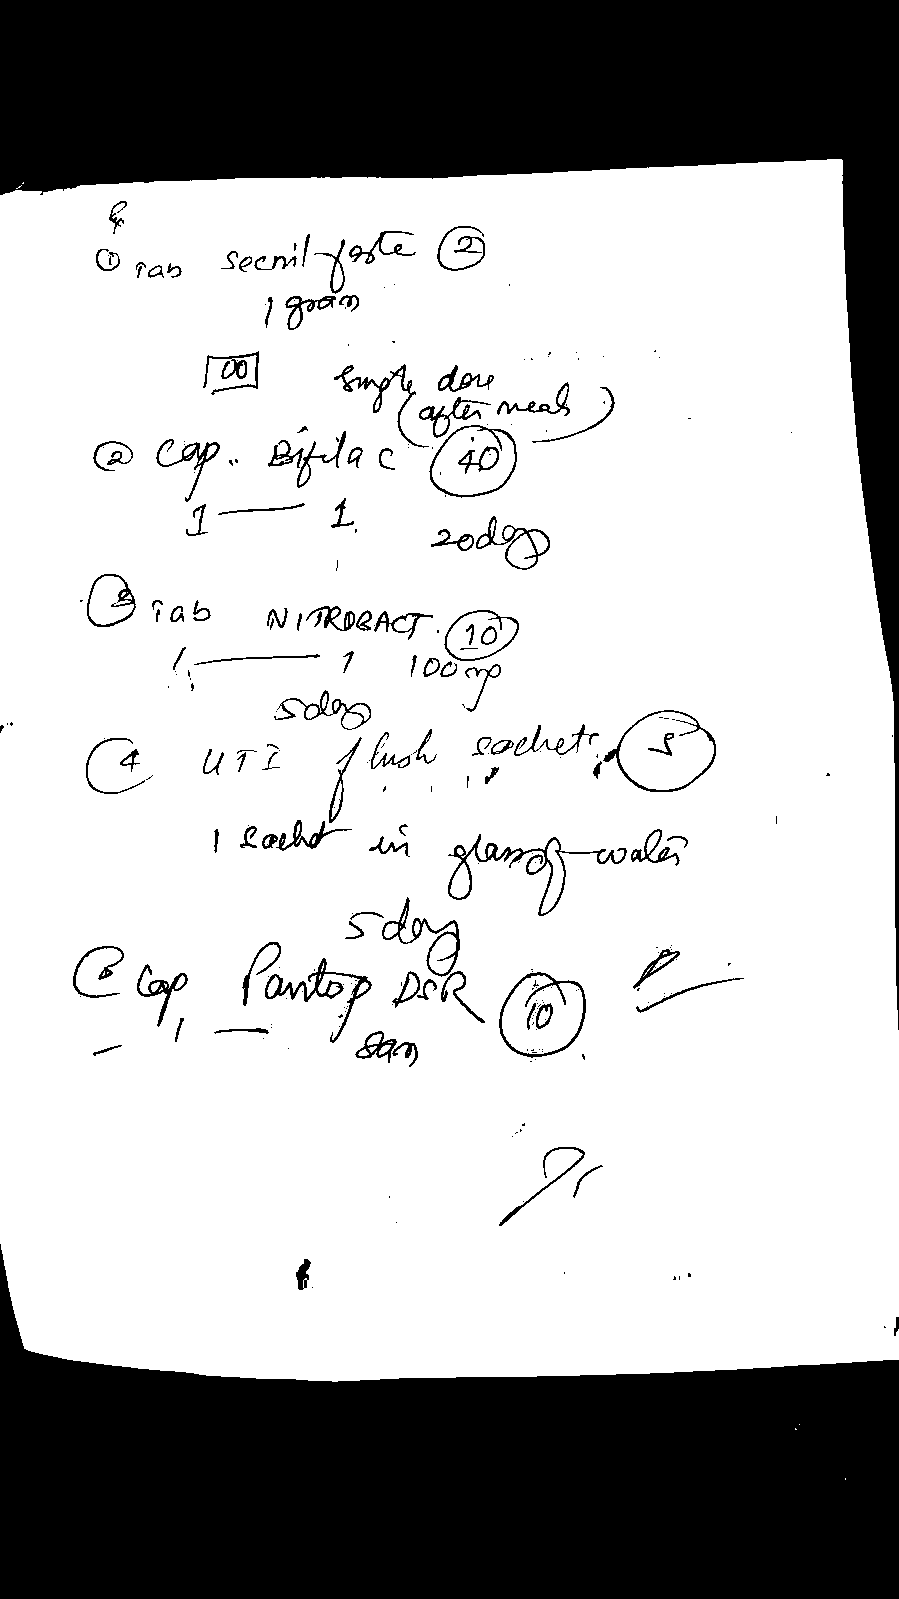

In [39]:
final_image

In [40]:
response = model.generate_content([prompt,final_image])
output_text = response.text
output_text


'R\n0 ran secnil feste ②\n1 gram\n00 sigle dow\nafter meal\n@ cap. biflac ④\n1 1 20dop\nQ rab NITROBACT ①⑩\n1 10000\n5dog\n@ UTI flush sachet\n1 sachet in glass of water\nSday\n@cap, Pantop RCR ⑩\ndam\n10'

Note:

OCR based on LLM Model seems to be a better option to extract text even from handwritten notes.
It may not be able to extract 100% but still it is giving better output than tesseract

## Extract text from docx(word document)

In [42]:
pip install python-docx

     -------------------------------------- 253.0/253.0 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
from docx import Document

In [46]:
file = Document(r"C:\Users\SAI\Downloads\gbUHRP.docx")

In [47]:
file

In [48]:
[p.text for p in file.paragraphs]

['STATISTICS ',
 '',
 'Descriptive Statistics',
 '1. What is the difference between population and sample?',
 'Population refers to the entire group being studied, while a sample is a subset of the population used for analysis.',
 '2. What are mean, median, and mode?',
 'Mean: The average of all values.',
 'Median: The middle value when arranged in order.',
 'Mode: The most frequently occurring value.',
 '3. What is the difference between variance and standard deviation?',
 'Variance measures how far data points are from the mean, squared.',
 'Standard deviation is the square root of variance, making it more interpretable in the same units as the data.',
 '4. What are skewness and kurtosis?',
 'Skewness: Measures the asymmetry of the data distribution.',
 'Positive skew → right tail is longer.',
 'Negative skew → left tail is longer.',
 'Kurtosis: Measures the "tailedness" of the distribution.',
 'High kurtosis → more outliers (leptokurtic).',
 'Low kurtosis → fewer outliers (platykurt

In [49]:
text_extracted = " ".join([p.text for p in file.paragraphs])

In [50]:
text_extracted

'STATISTICS   Descriptive Statistics 1. What is the difference between population and sample? Population refers to the entire group being studied, while a sample is a subset of the population used for analysis. 2. What are mean, median, and mode? Mean: The average of all values. Median: The middle value when arranged in order. Mode: The most frequently occurring value. 3. What is the difference between variance and standard deviation? Variance measures how far data points are from the mean, squared. Standard deviation is the square root of variance, making it more interpretable in the same units as the data. 4. What are skewness and kurtosis? Skewness: Measures the asymmetry of the data distribution. Positive skew → right tail is longer. Negative skew → left tail is longer. Kurtosis: Measures the "tailedness" of the distribution. High kurtosis → more outliers (leptokurtic). Low kurtosis → fewer outliers (platykurtic). 5. What is the difference between a parameter and a statistic? Param